### <center>Prediction of Credit Card customers leaving the company</center>
<br>

<p style="text-align: justify"><b>Hypothesis:</b> The chosen variables are expected to help predict whether the client will leave the Credit Card company or not.<br>
<b>Goal:</b> create a model that would help company owners predict for who is going to get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.<br>
<b>Data:</b> dependent variable is "Attrition_Flag " and independent variables are given as following: Customer Age, Gender, Dependent count, Period of relationship with bank, Total no. of products held by the customer, Months Inactive 12 mon, Contacts Count 12 mon, Credit Limit, Total Revolving Balance, Open to Buy Credit Line, Change in Transaction Amount (Q4 over Q1), Total Transactions amount, Total Transaction Count, Change in Transaction Count (Q4 over Q1), Average Card Utilization Ratio.</p>

In [1]:
#Importing of needed libruaries and data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
filename = 'BankChurners.csv'
df = pd.read_csv(filename, encoding="ansi")
df = df[df.columns[0:21]]

In [2]:
#Checking if data is without "Null" values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Data review

Text(0, 0.5, '')

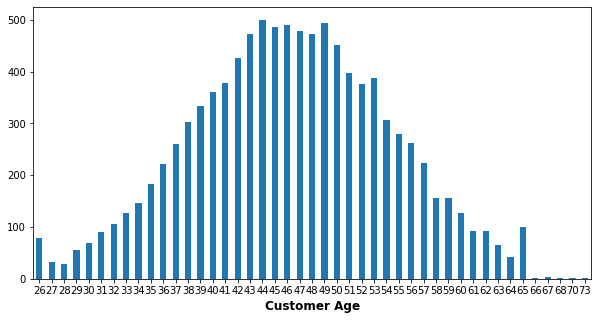

In [3]:
#Customers Age is distributed normaly
df_age = df.groupby('Customer_Age')['Customer_Age'].count()
df_age = pd.DataFrame(df_age)
df_age.rename(columns={'Customer_Age':'Age'}, inplace=True)
df_age = df_age.reset_index()
plt.rcParams["figure.figsize"] = [10, 5]
chart= df_age.plot.bar(x= 'Customer_Age', y='Age',rot=0, legend=False)
plt.xlabel("Customer Age", size=12, fontweight='bold')
plt.ylabel("")

Text(0, 0.5, '')

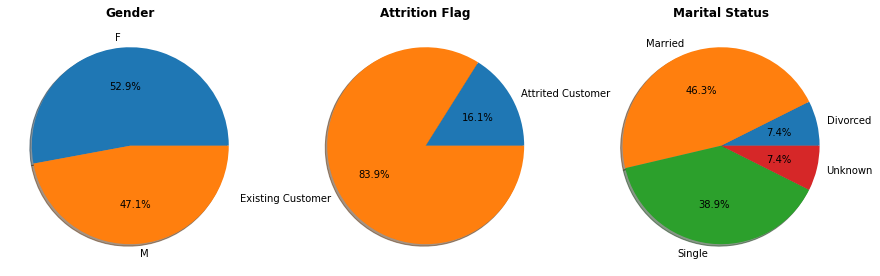

In [4]:
#The Distribution of gender and marital status is almost the same.
#There is only 16.1% of attrition customers, it means that this sample is imbalanced.
fig, axs = plt.subplots(ncols=3)
df_gender = df.groupby('Gender')['Gender'].count()
df_attrition = df.groupby('Attrition_Flag')['Attrition_Flag'].count()
df_status = df.groupby('Marital_Status')['Marital_Status'].count()
ax1=df_gender.plot.pie(y='Gender', figsize=(5, 5),autopct='%1.1f%%',ax=axs[0], shadow=True)
ax2=df_attrition.plot.pie(y='Attrition_Flag',figsize=(5, 5),autopct='%1.1f%%',ax=axs[1],shadow=True)
ax3=df_status.plot.pie(y='Marital_Status',figsize=(5, 5),autopct='%1.1f%%',ax=axs[2],shadow=True)
fig.set_figheight(20)
fig.set_figwidth(15)
ax1.set_title('Gender', fontdict={'fontsize': 12}, fontweight='bold')
ax2.set_title('Attrition Flag',fontdict={'fontsize': 12}, fontweight='bold')
ax3.set_title('Marital Status',fontdict={'fontsize': 12}, fontweight='bold')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

Text(0, 0.5, '')

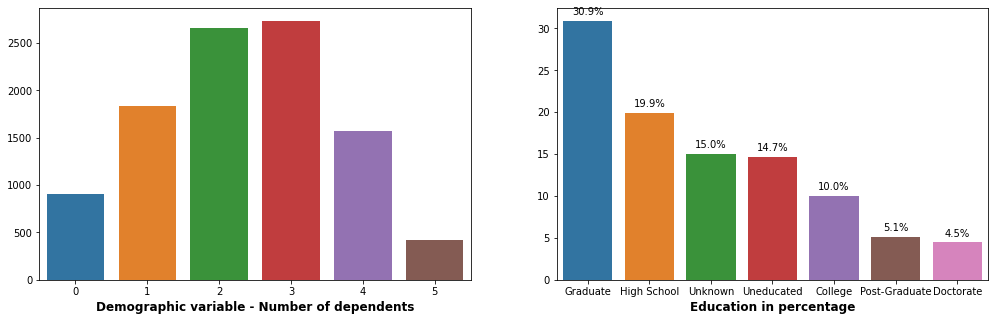

In [5]:
#Number of dependents graph shows that the most popular family size of the customers is 2-3 people. 
# The graph of education shows that 31% customers have graduated.  
fig, axs = plt.subplots(ncols=2)
ax1 = sns.countplot(x='Dependent_count', data=df, ax=axs[0])
ax1.set_xlabel("Demographic variable - Number of dependents", size=12, fontweight='bold')
ax1.set_ylabel("")
df_education = df.groupby('Education_Level')['Education_Level'].count()
df_education = pd.DataFrame(df_education)
df_education.rename(columns={'Education_Level':'Level'}, inplace=True)
df_education = df_education.reset_index()
df_education.insert(2, "All", df_education['Level'].sum(), True)
df_education['Procentai'] = df_education['Level'] / df_education['All']*100
df_education = df_education.drop(columns= ['Level', 'All'])
df_education = df_education.sort_values('Procentai', ascending=False)
ax2 = sns.barplot(x= 'Education_Level', y='Procentai' ,data=df_education, ax=axs[1])
for p in ax2.patches:
    ax2.annotate((format(p.get_height(), '.1f')+ '%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
fig.set_figheight(5)
fig.set_figwidth(17)
ax2.set_xlabel("Education in percentage", size=12, fontweight='bold')
ax2.set_ylabel("")

Text(0, 0.5, '')

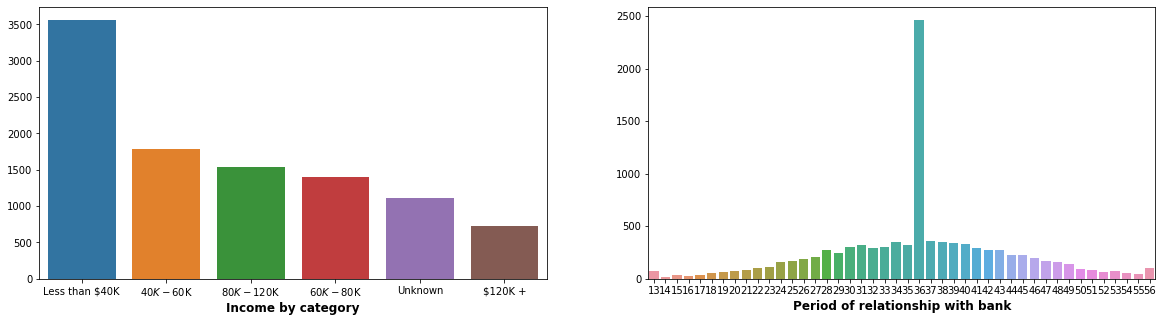

In [6]:
#The largest amount of customers have less than $40K annual income. 
#Also, there is a big amount of customers that have been customers of the bank for 36 months.
fig, axs = plt.subplots(ncols=2)
df_income = df.groupby('Income_Category')['Income_Category'].count()
df_income = pd.DataFrame(df_income)
df_income.rename(columns={'Income_Category':'Income'}, inplace=True)
df_income = df_income.reset_index()
df_income = df_income.sort_values('Income', ascending=False)
ax1 = sns.barplot(x='Income_Category', y='Income', data=df_income, ax=axs[0])
df_MOB = df.groupby('Months_on_book')['Months_on_book'].count()
df_MOB = pd.DataFrame(df_MOB)
df_MOB.rename(columns={'Months_on_book':'Time in bank'}, inplace=True)
df_MOB = df_MOB.reset_index()
df_MOB = df_MOB.sort_values('Time in bank', ascending=False)
ax2 = sns.barplot(x='Months_on_book', y='Time in bank', data=df_MOB, ax=axs[1])
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.set_xlabel("Income by category", size=12, fontweight='bold')
ax1.set_ylabel("")
ax2.set_xlabel("Period of relationship with bank", size=12,fontweight='bold')
ax2.set_ylabel("")

Text(0, 0.5, '')

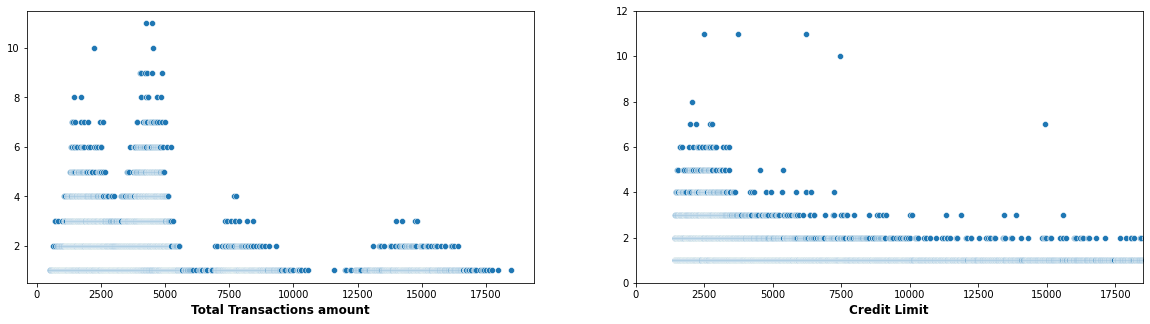

In [7]:
#Total transactions amount seems devided into four groups. 
#Also, there are more customers with a small credit card limit.
fig, axs = plt.subplots(ncols=2)
df_Trans = df.groupby('Total_Trans_Amt')['Total_Trans_Amt'].count()
df_Trans = pd.DataFrame(df_Trans)
df_Trans.rename(columns={'Total_Trans_Amt':'Amount of the transactions'}, inplace=True)
df_Trans = df_Trans.reset_index()
ax1=sns.scatterplot(x='Total_Trans_Amt',y='Amount of the transactions',data=df_Trans,ax=axs[0])
plt.ylim(0, 12)
plt.xlim(0, 18500)
df_limit = df.groupby('Credit_Limit')['Credit_Limit'].count()
df_limit = pd.DataFrame(df_limit)
df_limit.rename(columns={'Credit_Limit':'Credit Limit'}, inplace=True)
df_limit = df_limit.reset_index()
df_limit = df_limit.drop(df_limit.index[0])
df_limit = df_limit.drop(df_limit.index[-1])
ax2 = sns.scatterplot(x='Credit_Limit', y='Credit Limit', data=df_limit, ax=axs[1])
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.set_xlabel("Total Transactions amount", size=12, fontweight='bold')
ax1.set_ylabel("")
ax2.set_xlabel("Credit Limit", size=12,fontweight='bold')
ax2.set_ylabel("")

In [8]:
#Total Transactions amount graph showed there are four underlying groups in the data. 
#In this way it was decided to divide this variable into four groups as following:
df['Trans_Amt less than 3K'] = 0
df.loc[df['Total_Trans_Amt'] <=3000, 'Trans_Amt less than 3K'] =1
df['Trans_Amt 3K-6K'] = 0
df.loc[(df['Total_Trans_Amt'] >3000) & (df['Total_Trans_Amt']<=6000), 'Trans_Amt 3K-6K'] =1
df['Trans_Amt 6K-11K'] = 0
df.loc[(df['Total_Trans_Amt'] >6000) & (df['Total_Trans_Amt']<=11000), 'Trans_Amt 6K-11K'] =1
df['Trans_Amt more than 11K'] = 0
df.loc[df['Total_Trans_Amt'] >11000, 'Trans_Amt more than 11K'] =1
#Also other Data modificates were made:
df.loc[df['Attrition_Flag'] =='Existing Customer', 'Attrition_Flag'] =1
df.loc[df['Attrition_Flag'] =='Attrited Customer', 'Attrition_Flag'] =0
df.loc[df['Gender'] =='M', 'Gender'] =1
df.loc[df['Gender'] =='F', 'Gender'] =0
df['Attrition_Flag'] = df['Attrition_Flag'].astype(float)
df['Gender'] = df['Gender'].astype(float)
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df = df.drop(columns=['CLIENTNUM', 'Education_Level','Marital_Status',
                      'Income_Category','Card_Category'])

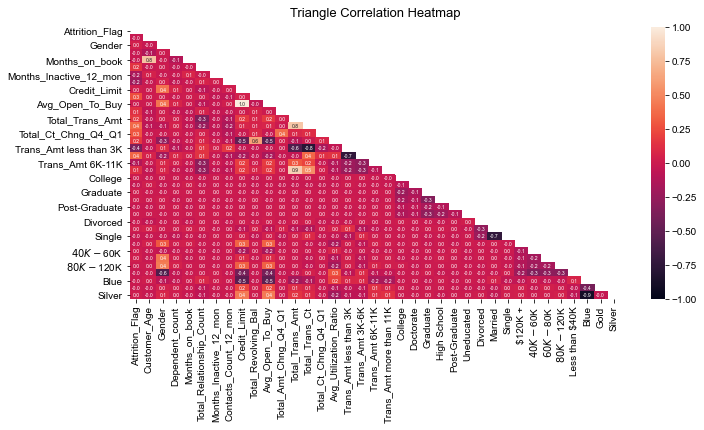

In [9]:
#Checking Correlation between all variables
plt.figure(figsize=(11, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True,
                      fmt='.1f',annot_kws={"size": 5})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':13}, pad=11)
sns.set(font_scale=1)

#### Model Creation

In [10]:
#Function for calculating Precision and F1 score 
def err_metric(CM):
    TN = conf_m[0, 0]
    FN = conf_m[1, 0]
    TP = conf_m[1, 1]
    FP = conf_m[0, 1]
    precision = (TP) / (TP + FP)
    accuracy_model = (TP + TN) / (TP + TN + FP + FN)
    recall_score = (TP) / (TP + FN)
    f1_score = 2 * ((precision * recall_score) / (precision + recall_score))
    print("F1 score of the model: ", f1_score)
    print('Precision:', precision)
    print('Accuracy_model:', accuracy_model)

In [11]:
#Splitting data into Train and test samples
xTrain, xTest, yTrain, yTest = train_test_split(df[['Customer_Age','Gender','Dependent_count',
                                                    'Months_on_book','Total_Relationship_Count',
                                                    'Months_Inactive_12_mon','Contacts_Count_12_mon',
                                                    'Credit_Limit', 'Total_Revolving_Bal',
                                                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                                                    'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 
                                                    'Avg_Utilization_Ratio','College','Doctorate', 
                                                    'Graduate','High School', 'Post-Graduate',
                                                    'Uneducated','Divorced', 'Married','Single',
                                                    '$120K +','$40K - $60K','$60K - $80K',
                                                    '$80K - $120K','Less than $40K', 'Blue',
                                                    'Gold', 'Silver', 'Total_Trans_Amt']],
                                                df['Attrition_Flag'],test_size=0.3)

In [12]:
# Applying Random Forest Classifier model 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.9501421800947868
Precision: 0.9176125961186379
Accuracy_model: 0.9134583744652847


In [13]:
# Applying Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.9485781067393845
Precision: 0.9401544401544402
Accuracy_model: 0.9131293188548865


In [14]:
# Because of imbalanced dependent variable it is necessary to perform modifications.
# Random under-sampling is used in this case:
df_majority_count, df_minority_count = df.Attrition_Flag.value_counts()
df_majority = df[df.Attrition_Flag==1]
df_minority = df[df.Attrition_Flag==0]
df_majority_under = df_majority.sample(df_minority_count)
df_test_under = pd.concat([df_majority_under, df_minority], axis=0)
print('Random under-sampling:')
print(df_test_under.Attrition_Flag.value_counts())
df=df_test_under

Random under-sampling:
0.0    1627
1.0    1627
Name: Attrition_Flag, dtype: int64


In [15]:
#Splitting data into Train and test samples
#(including "Total Transaction amount" without splitting into four groups)
xTrain, xTest, yTrain, yTest = train_test_split(df[['Customer_Age', 'Gender', 'Dependent_count',
                                                    'Months_on_book','Total_Relationship_Count',
                                                    'Months_Inactive_12_mon','Contacts_Count_12_mon',
                                                    'Credit_Limit','Total_Revolving_Bal',
                                                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                                                    'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 
                                                    'Avg_Utilization_Ratio', 'College',
                                                    'Doctorate','Graduate','High School',
                                                    'Post-Graduate', 'Uneducated','Divorced',
                                                    'Married','Single', '$120K +','$40K - $60K',
                                                    '$60K - $80K', '$80K - $120K','Less than $40K',
                                                    'Blue','Gold', 'Silver', 'Total_Trans_Amt']],
                                                df['Attrition_Flag'],test_size=0.3)

In [16]:
# Applying Random Forest Classifier model 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.9010526315789473
Precision: 0.9145299145299145
Accuracy_model: 0.9037871033776868


In [17]:
# Applying Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.8555240793201134
Precision: 0.7850953206239168
Accuracy_model: 0.8433981576253838


In [18]:
#Splitting data into Train and test samples 
#(including "Total Transaction amount" splitted into four groups")
xTrain, xTest, yTrain, yTest = train_test_split(df[['Customer_Age', 'Gender', 'Dependent_count',
                                                    'Months_on_book','Total_Relationship_Count',
                                                    'Months_Inactive_12_mon','Contacts_Count_12_mon',
                                                    'Credit_Limit', 'Total_Revolving_Bal',
                                                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                                                    'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 
                                                    'Avg_Utilization_Ratio','Trans_Amt less than 3K',
                                                    'Trans_Amt 3K-6K', 'Trans_Amt 6K-11K',
                                                    'Trans_Amt more than 11K', 'College',
                                                    'Doctorate','Graduate','High School',
                                                    'Post-Graduate', 'Uneducated','Divorced',
                                                    'Married','Single', '$120K +','$40K - $60K',
                                                    '$60K - $80K', '$80K - $120K','Less than $40K',
                                                    'Blue','Gold', 'Silver']],df['Attrition_Flag'],
                                                test_size=0.3)

In [19]:
# Applying Random Forest Classifier model 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.9116080937167199
Precision: 0.9511111111111111
Accuracy_model: 0.9150460593654043


In [20]:
# Applying Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)
conf_m = confusion_matrix(yTest, yPred)
err_metric(conf_m)

F1 score of the model:  0.8717472118959108
Precision: 0.7989778534923339
Accuracy_model: 0.8587512794268168


#### Conclusion

<p style="text-align: justify">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data review showed that the main dependent variable "Attrition Flag" is unbalanced and that may cause misleading accuracy. In this way random under-sampling was used. Decision Tree and Random Forest models were performed both with balanced and unbalanced data. Some improvement after rasampling is shown as F1 score decreased. On the other hand, this method could have caused  information loss.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Also, after data review one variable was split into four groups and models were run seperately. On the other hand, results are mostly the same. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Taking everything into consideration, F1 score is still quite big and it would be better to perform other data resampling techniques for future improvement of the model.<br></p>